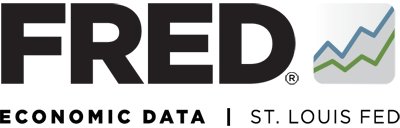

The FRED® API is a web service that allows developers to write programs and build applications that retrieve economic data from the FRED® and ALFRED® websites hosted by the Economic Research Division of the Federal Reserve Bank of St. Louis. Requests can be customized according to data source, release, category, series, and other preferences. <BR>
[https://fred.stlouisfed.org/docs/api/fred/](https://fred.stlouisfed.org/docs/api/fred/)

### Create FRED free account 
- https://fred.stlouisfed.org/

In [1]:
# 畫圖係EDA exploration Data Analysis 探索分析
# Descriptive Analysis
# 做 Model 係 Predictive Analysis

In [3]:
import numpy as np
import pandas as pd
import requests
import yfinance as yf
import matplotlib.pyplot as plt
import os
from fredapi import Fred  # fred.search('Treasury')

# Place your FRED API Key BELOW i.e.:  FRED_API_KEY = '12345678'
FRED_API_KEY = "accde10bd6b603b66581c0fc6304eac2"
fred = Fred(api_key=FRED_API_KEY) 

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
apiFrom = '2022-01-01' #拎API日期
apiTo = '2024-10-20' #拎API最後日期

df_HSI = yf.download('^HSI', start=apiFrom, end=apiTo, auto_adjust=True).droplevel('Ticker', axis=1)

[*********************100%***********************]  1 of 1 completed


In [4]:
# 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity (T10Y2Y 10年-2年)
T10Y2Y = fred.get_series('T10Y2Y' ,observation_start = apiFrom, observation_end = apiTo) 

# Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity
T2Y = fred.get_series('DGS2',observation_start = apiFrom, observation_end = apiTo)

# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity
T10Y = fred.get_series('DGS10',observation_start = apiFrom, observation_end = apiTo)

In [5]:
df_HSI['T10Y2Y'], df_HSI['T2Y'], df_HSI['T10Y'] = T10Y2Y, T2Y, T10Y

In [6]:
df_HSI.head(3)

Price,Close,High,Low,Open,Volume,T10Y2Y,T2Y,T10Y
Date,,,,,,,,
2022-01-03,23274.750000,23605.029297,23193.189453,23510.539062,734331100,0.85,0.78,1.63
2022-01-04,23289.839844,23439.300781,23146.890625,23400.619141,1760141200,0.89,0.77,1.66
2022-01-05,22907.250000,23323.769531,22851.500000,23323.769531,2768859000,0.88,0.83,1.71


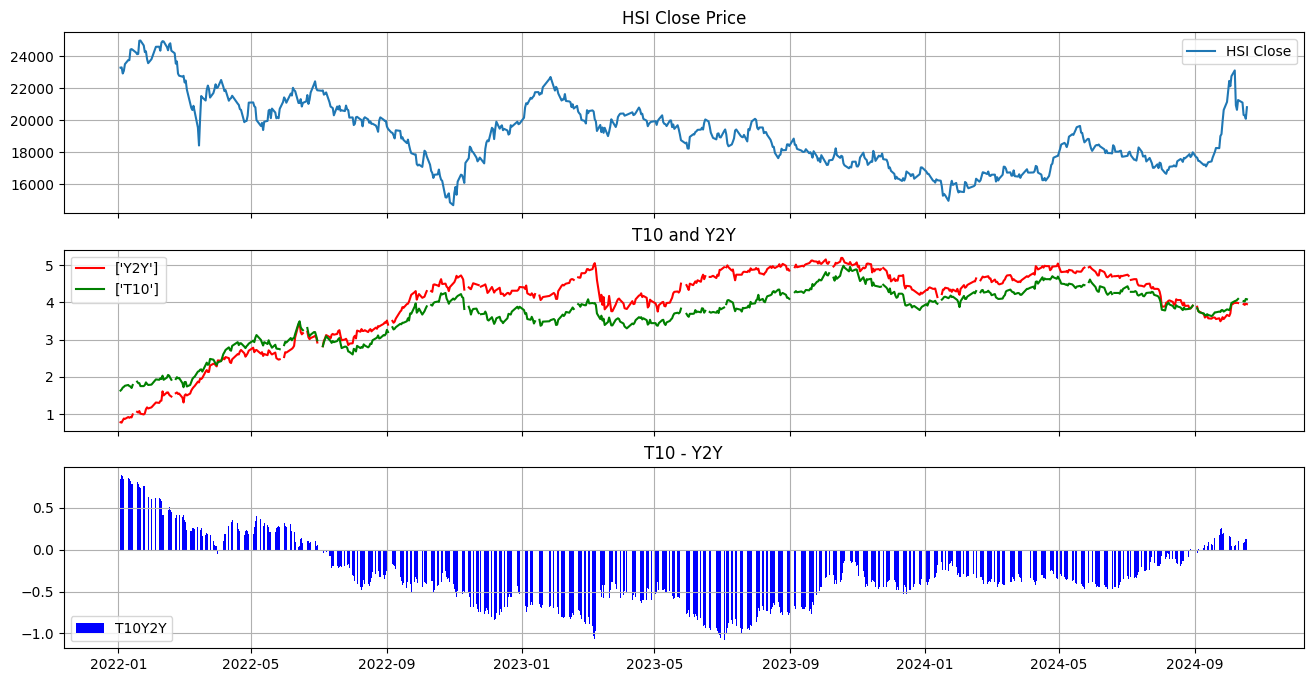

In [7]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(16, 8))

ax0.plot(df_HSI.index.unique(), df_HSI['Close'])
ax1.plot(df_HSI.index.unique(), df_HSI['T2Y'], color='red' )
ax1.plot(df_HSI.index.unique(), df_HSI['T10Y'], color='green' )
ax2.bar(df_HSI.index.unique(), df_HSI['T10Y2Y'], color='blue' )

ax0.set_title("HSI Close Price")
ax1.set_title("T10 and Y2Y")
ax2.set_title("T10 - Y2Y")

ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

ax0.legend(['HSI Close'])
ax1.legend([['Y2Y'],['T10']])
ax2.legend(['T10Y2Y'])
plt.show()

# 查看Correlation 的關係

In [8]:
df_HSI['Close'].corr(df_HSI['T10Y2Y'])

0.42535689046483577

In [9]:
df_HSI['LogRtn'] = np.log(df_HSI['Close'] / df_HSI['Close'].shift(1))

<Axes: ylabel='Frequency'>

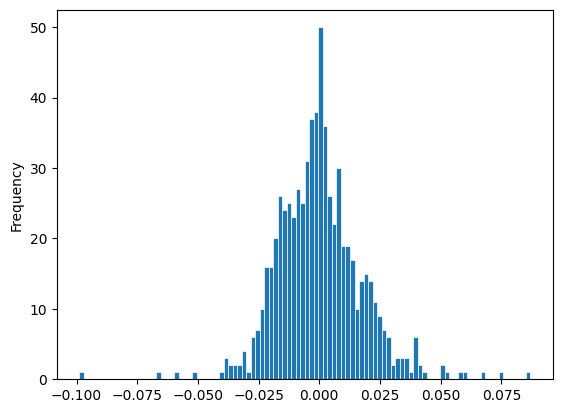

In [10]:
df_HSI['LogRtn'].plot.hist(bins=100, linewidth=0.5, edgecolor="white")

# Hong Kong GPD - 1960 to 2023 

In [11]:
df_HKGDP = pd.DataFrame(fred.get_series('MKTGDPHKA646NWDB'), columns=['Value'])
df_HKGDP.tail(2)

,Value
2022-01-01,3.586811e+11
2023-01-01,3.808122e+11


<Axes: >

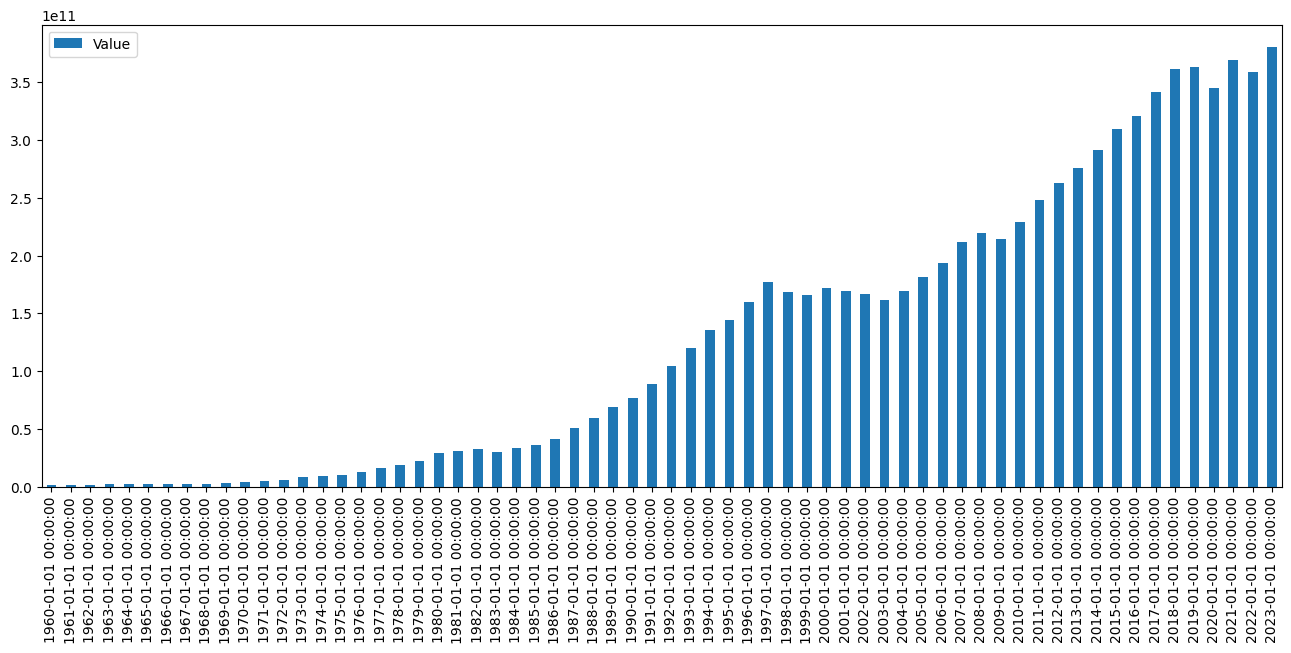

In [12]:
df_HKGDP.plot.bar(figsize=(16,6))

In [ ]:
fred.get_series('MKTGDPHKA646NWDB', observation_start = apiFrom, )